In [1]:
import os
import mlflow
os.environ["KERAS_BACKEND"] = "torch"
import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plot
import temporal_fusion_transformers as tft

import mlflow_utils


os.environ["MLFLOW_TRACKING_URI"] = "https://mlflow-server-med-jupyter-central-dev.apps.dev.ocp.bisinfo.org"

import seaborn as sns
sns.set_style("darkgrid")
pd.plotting.register_matplotlib_converters()
# Default figure size
sns.mpl.rc("figure", figsize=(12, 4))
sns.mpl.rc("font", size=12)

In [2]:
exp_id = mlflow_utils.get_or_create_experiment("TFT")
parent_id = mlflow.search_runs(
    experiment_ids=exp_id,
    order_by=["created DESC"],
    filter_string = "`Run Name`='Parent run'",
    max_results=1
).run_id.values[0]
runs = mlflow.MlflowClient().search_runs(experiment_ids=exp_id, filter_string=f"tags.mlflow.parentRunId = '{parent_id}'")

In [3]:
models = {}
for run in runs:
    model_path = f"runs:/{run.info.run_id}/model"
    if "TFT" in run.info.run_name:
        model = mlflow_utils.load_keras_model(model_path)
    else:
        model=mlflow.statsmodels.load_model(model_path)
    models[run.info.run_name] = model


/opt/app-root/src/jupyter_workspace/share/nowcasting/NowcastML/nowcastenv/lib64/python3.9/site-packages/keras/src/saving/saving_lib.py:388: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 332 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
100%|██████████| 1/1 [00:00<00:00, 198.00it/s]
/opt/app-root/src/jupyter_workspace/share/nowcasting/NowcastML/nowcastenv/lib64/python3.9/site-packages/keras/src/saving/saving_lib.py:388: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 332 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


/opt/app-root/src/jupyter_workspace/share/nowcasting/NowcastML/nowcastenv/lib64/python3.9/site-packages/keras/src/saving/saving_lib.py:388: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 264 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
100%|██████████| 1/1 [00:00<00:00, 231.54it/s]
/opt/app-root/src/jupyter_workspace/share/nowcasting/NowcastML/nowcastenv/lib64/python3.9/site-packages/keras/src/saving/saving_lib.py:388: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 264 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcas

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 634ms/step


/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcas

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 640ms/step


/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcas

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 636ms/step


/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)
/usr/local/lib64/python3.9/site-packages/statsmodels/tsa/deterministic.py:307: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcas

9/9 ━━━━━━━━━━━━━━━━━━━━ 6s 627ms/step


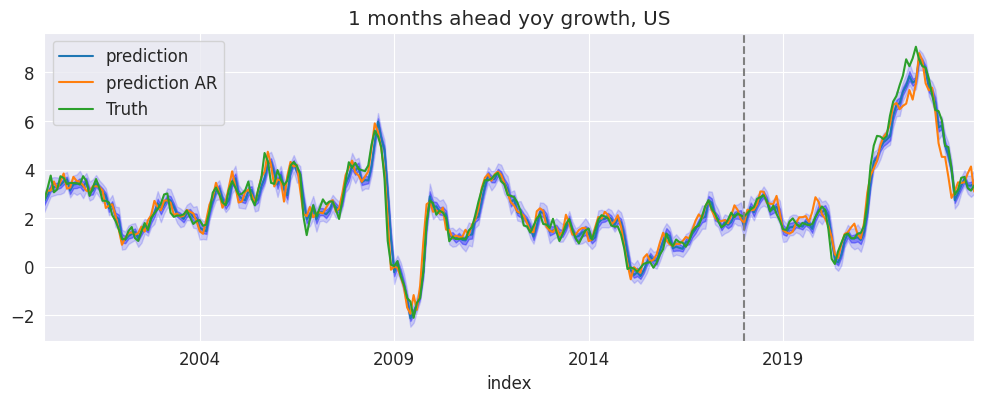

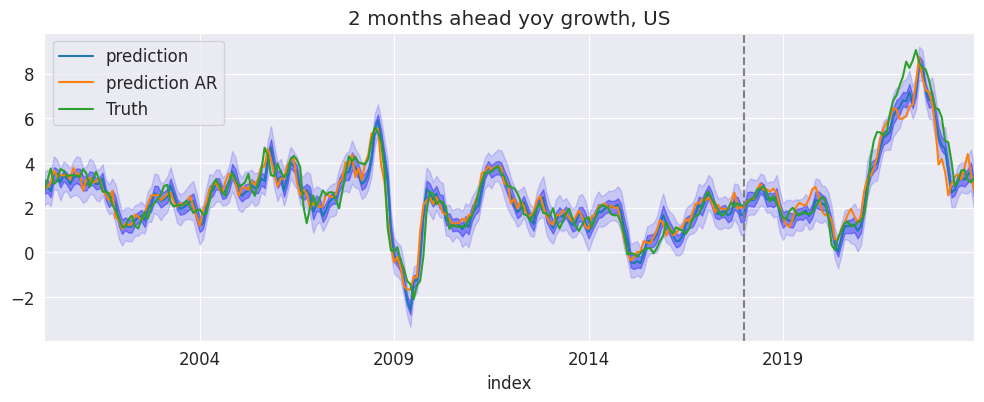

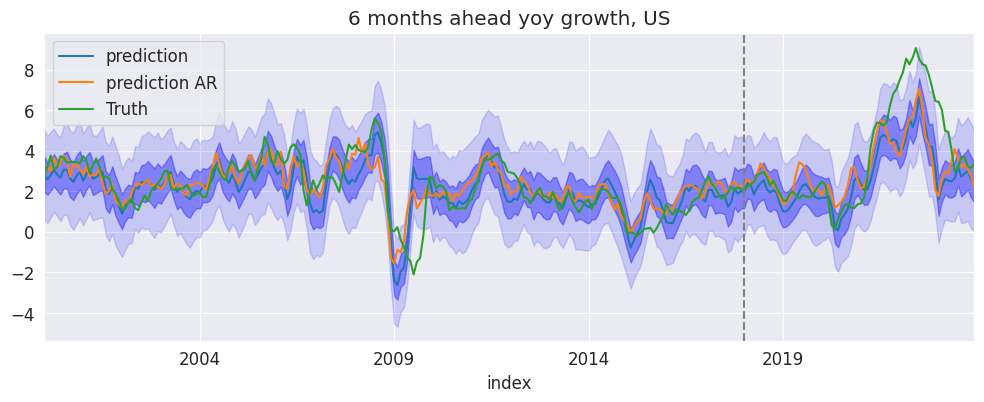

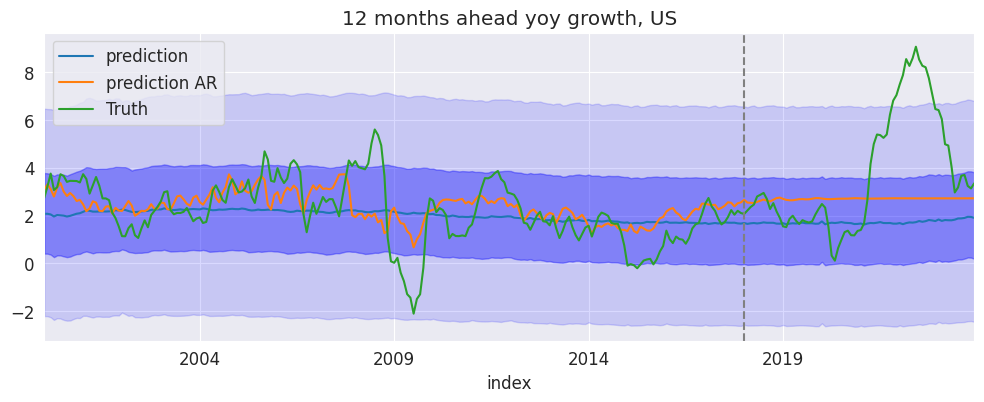

In [4]:
for n_months_ahead in [1, 2, 6, 12]:
    for country in ["US"]:
        plot.yoy_plot(models["TFT_full"], models[f"Autoreg_{country}"], "2000-01-01", "2023-12-01", country, n_months_ahead, True)

In [52]:
x = plot.create_predicition_sample("1980-01-01", "2023-01-01", "US")

In [53]:
predictions = models["TFT_full"].predict(x)

17/17 ━━━━━━━━━━━━━━━━━━━━ 11s 652ms/step


[Text(0, 0.5, 'MoM inflation [%]'), Text(0.5, 1.0, 'US MoM inflation')]

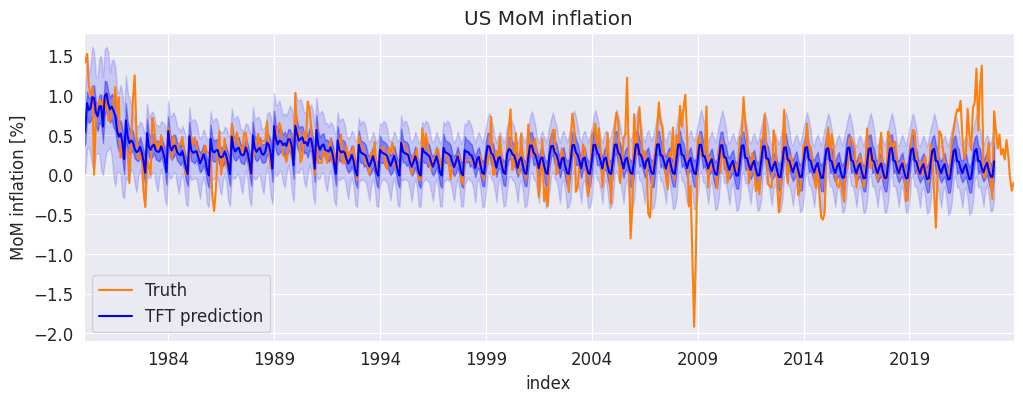

In [57]:
fig, ax = plt.subplots()
y = predictions[:,0,:]

pred_df = pd.DataFrame(
    data=y,
    columns=[f"quantile_{q:.2f}" for q in tft.quantiles],
    index=plot.create_monthly_index("1980-01-01", len(y)),
)

tft.df_target_1m_pct.loc["1980-01-01":,"US"].plot(color="C1", label="Truth")
pred_df["quantile_0.50"].plot(color="b", label="TFT prediction")

ax.fill_between(
    pred_df.index,
    pred_df["quantile_0.05"],
    pred_df["quantile_0.95"],
    color="b",
    alpha=0.15,
)
ax.fill_between(
    pred_df.index,
    pred_df["quantile_0.25"],
    pred_df["quantile_0.75"],
    color="b",
    alpha=0.35,
)
ax.legend()
ax.set(ylabel="MoM inflation [%]", title="US MoM inflation")

In [55]:
y.shape

(517, 5)